# seaborn.stripplot
---
A strip plot is a scatter plot where one of the variables is categorical. They can be combined with other plots to provide additional information. For example, a boxplot with an overlaid strip plot becomes more similar to a violin plot because some additional information about how the underlying data is distributed becomes visible. Seaborn's `swarmplot` is virtually identical except that it prevents datapoints from overlapping. 

dataset: [Kaggle: NBA shot logs](https://www.kaggle.com/dansbecker/nba-shot-logs)

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

This is a cool dataset that contains information about shot attempts made by professional basketball players.

In [4]:
df = pd.read_csv('../stripplot/shot_logs.csv',usecols=['player_name','SHOT_DIST','PTS_TYPE','SHOT_RESULT'])
players_to_use = ['kyrie irving', 'lebron james', 'stephen curry', 'jj redick']
df = df.loc[df.player_name.isin(players_to_use)]
df.head()

SHOT_DIST  PTS_TYPE SHOT_RESULT    player_name
14054        8.0         2      missed  stephen curry
14055       25.9         3      missed  stephen curry
14056       23.8         3        made  stephen curry
14057       27.5         3        made  stephen curry
14058       29.3         3      missed  stephen curry

Basic plot

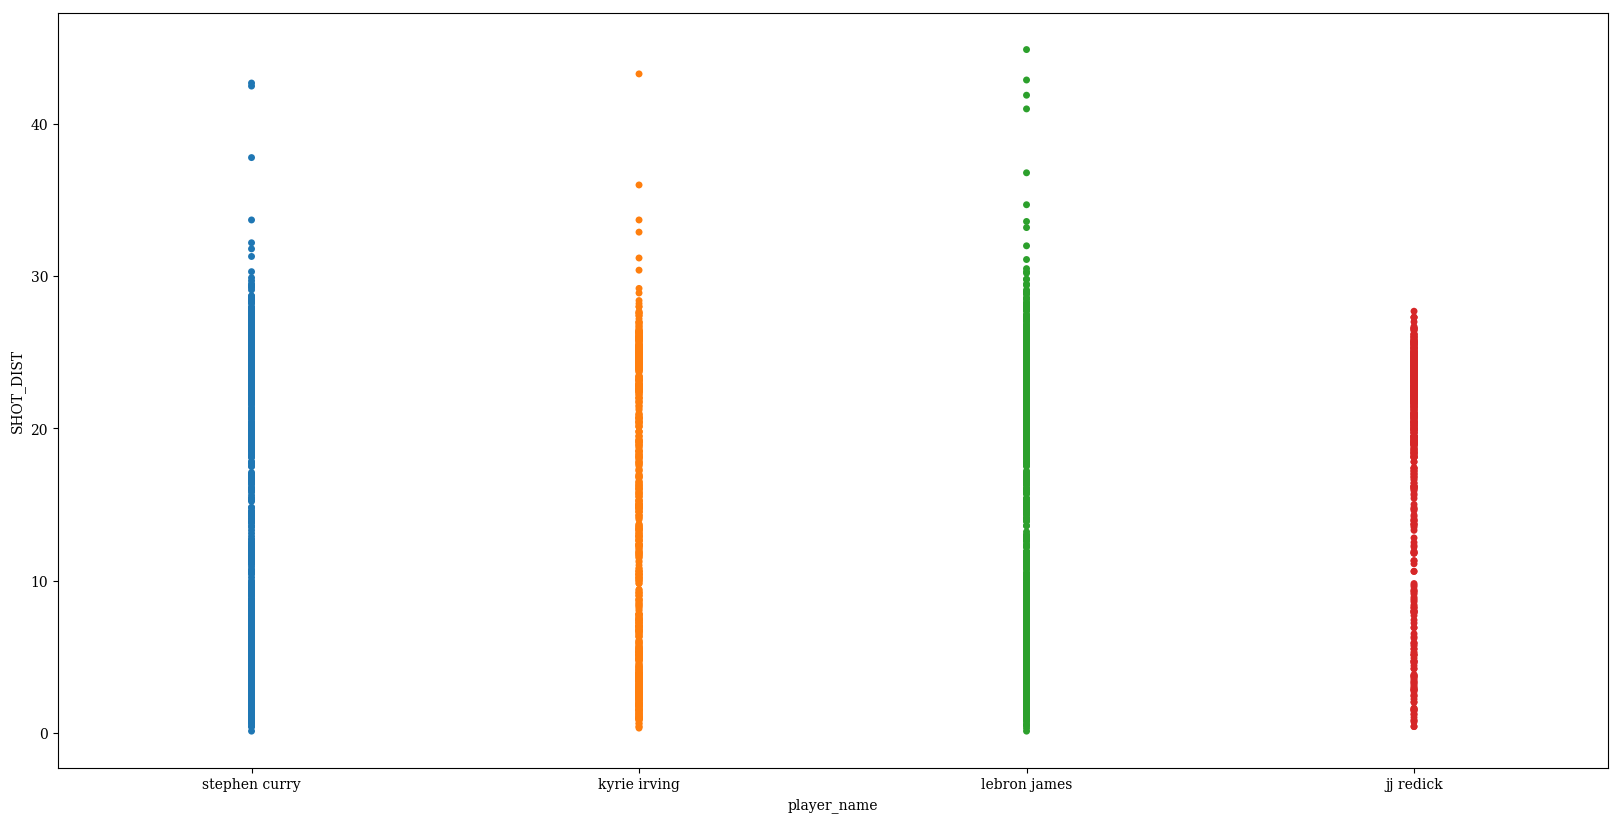

In [5]:
p = sns.stripplot(data=df, x='player_name', y='SHOT_DIST')

Change the `color` to represent whether the shot was made or missed

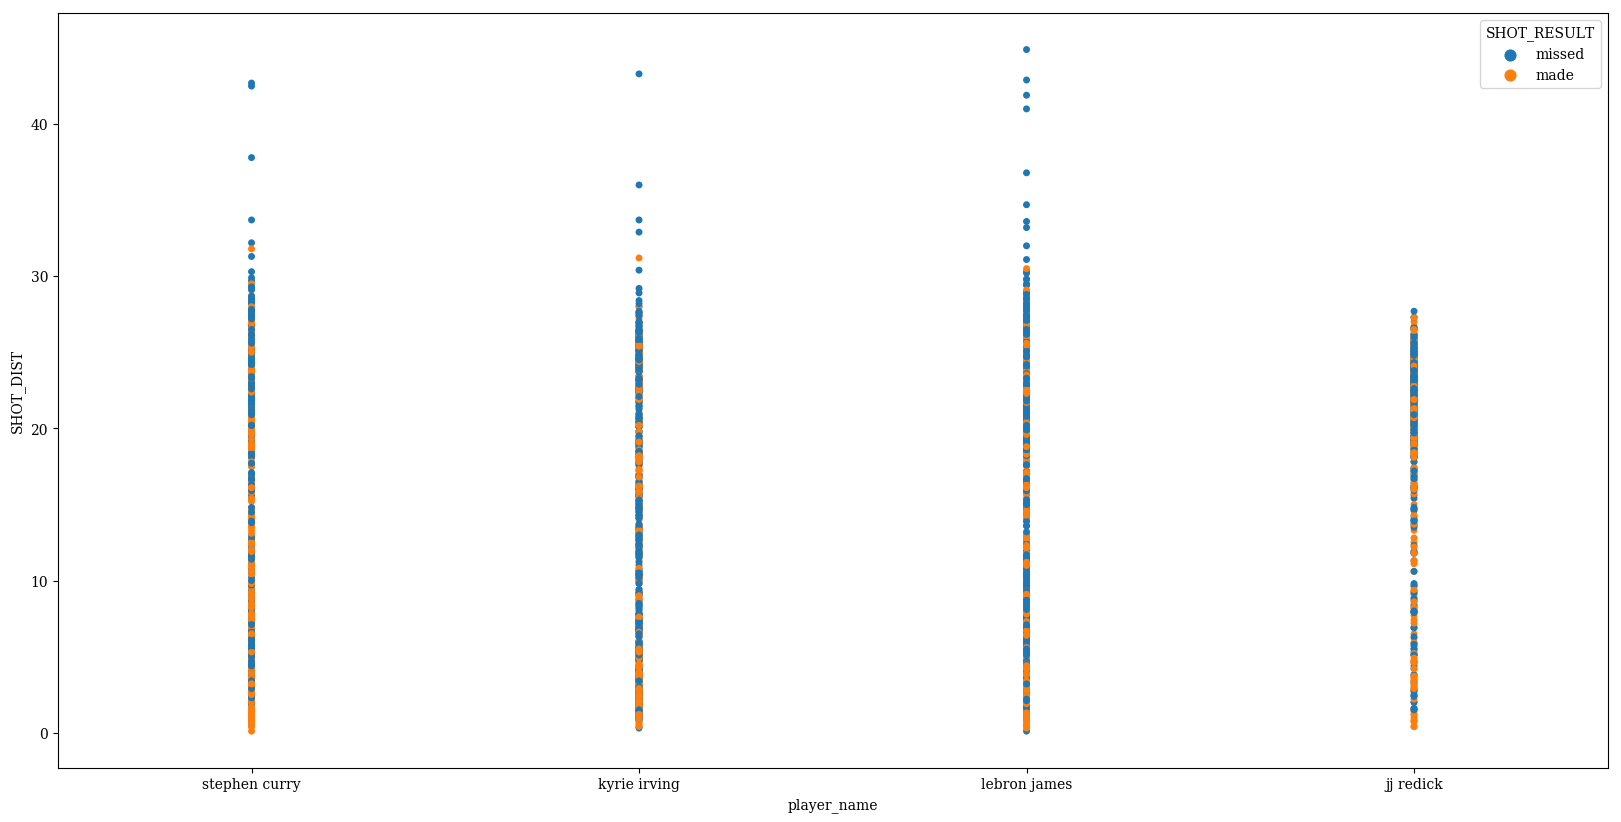

In [6]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT')

Change the `order` in which the names are displayed

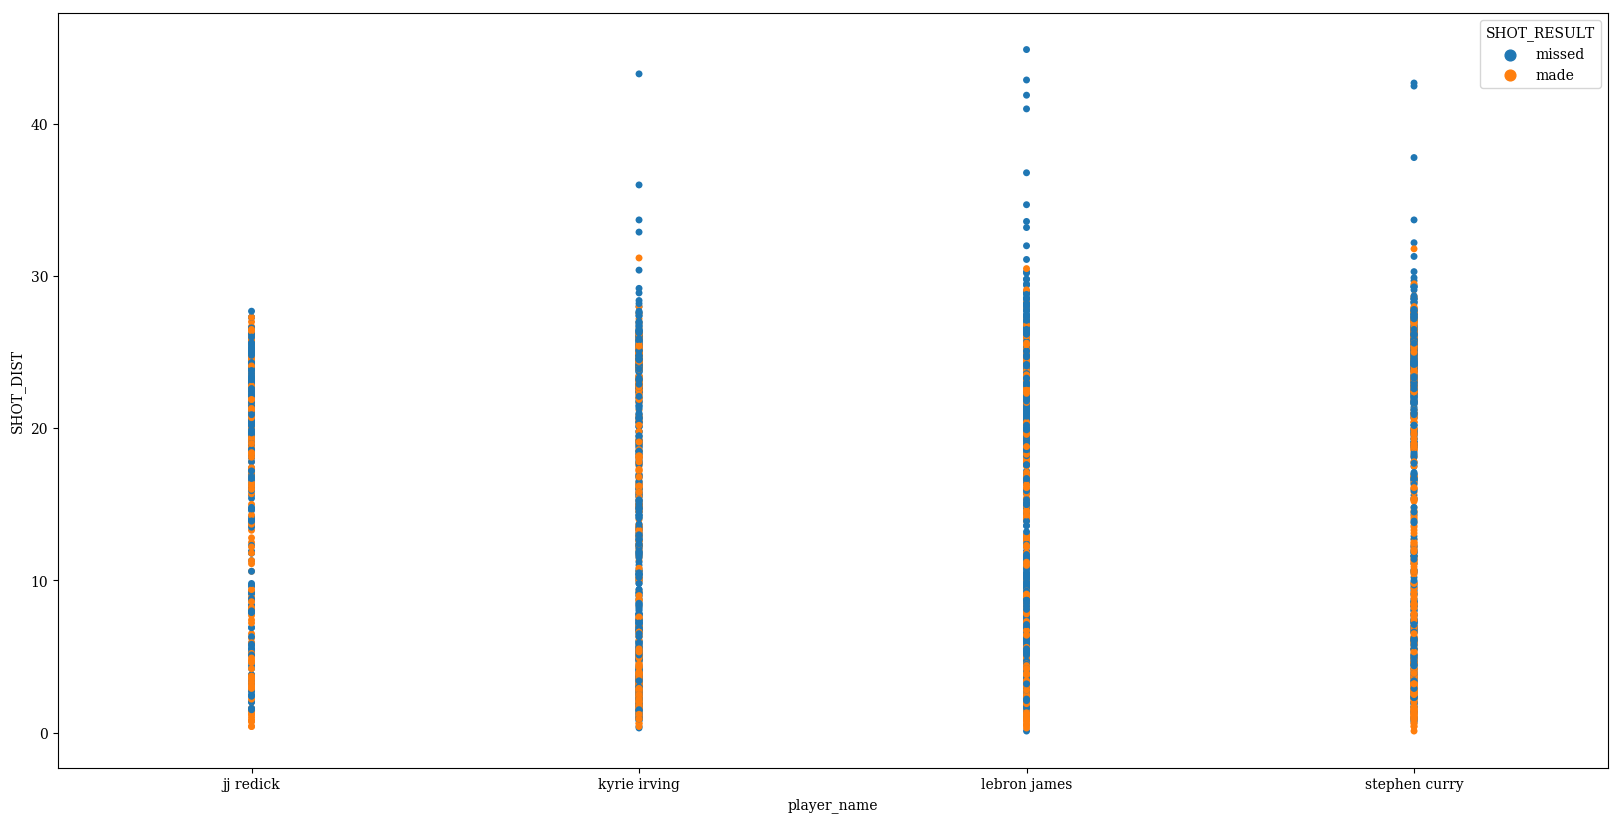

In [7]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use))

`jitter` can be used to randomly provide displacements along the horizontal axis, which is useful when there are large clusters of datapoints

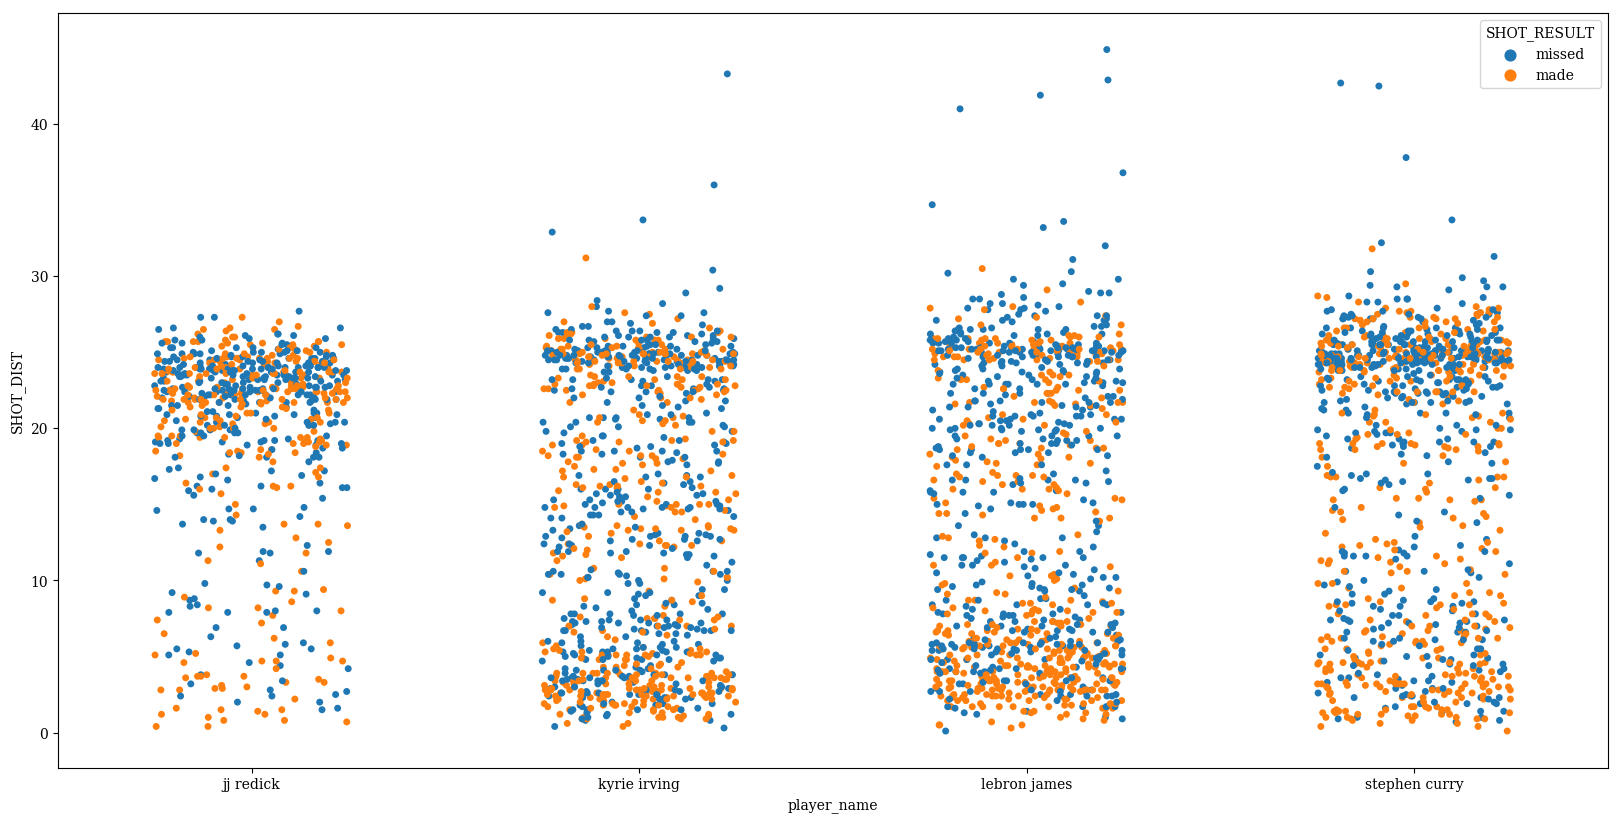

In [8]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25)

We see the default behavior is to stack the different hues on top of each other. This can be avoided with `dodge` (formerly called `split`)

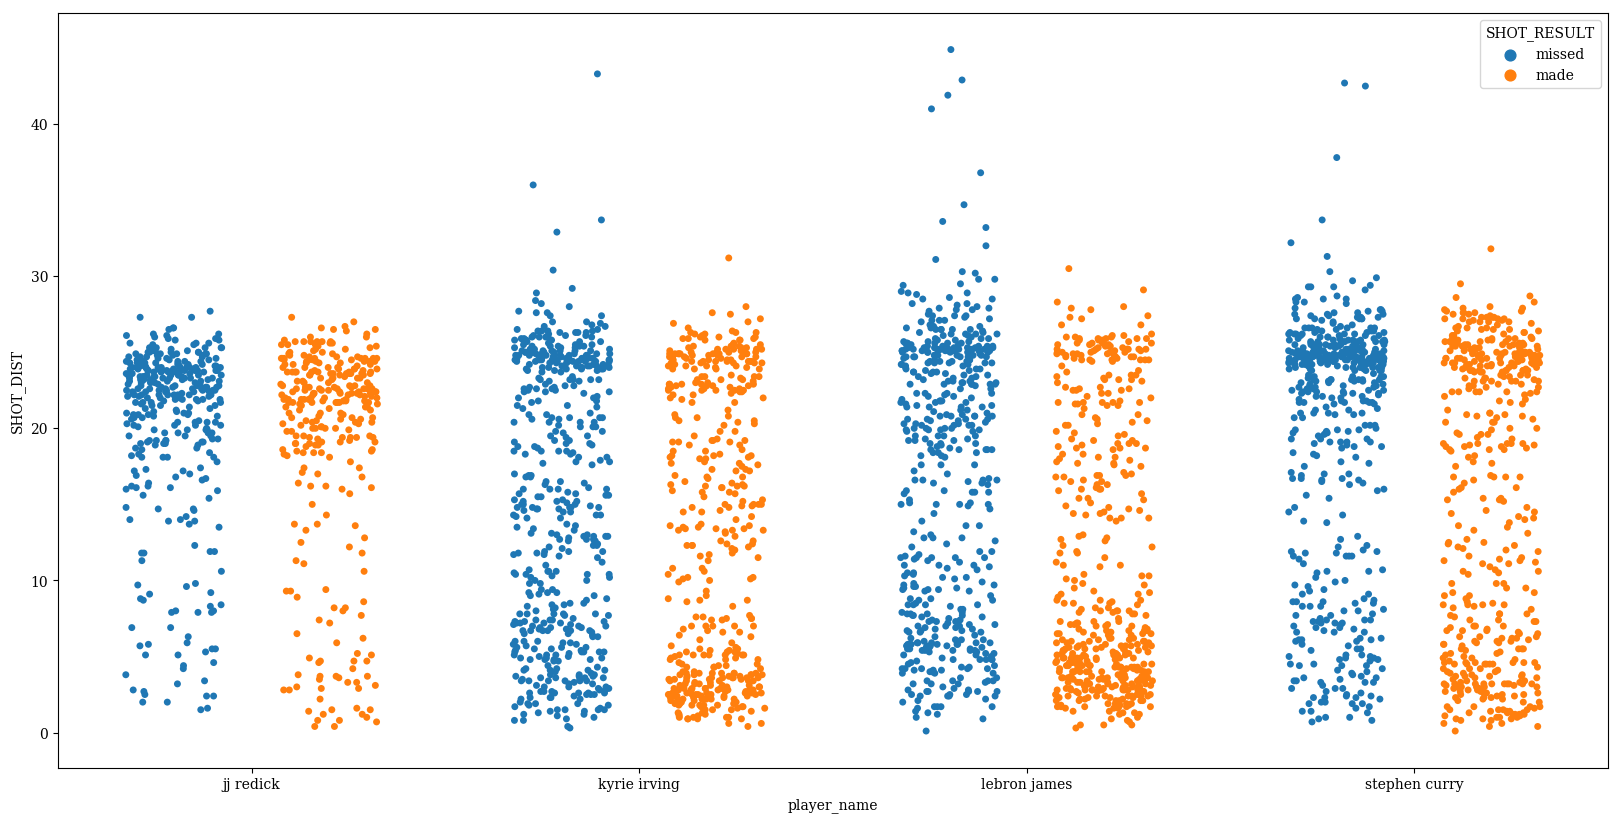

In [9]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25,
                  dodge=True)

Flipping x and y inputs and setting `orient` to 'h' can be used to make a horizontal plot

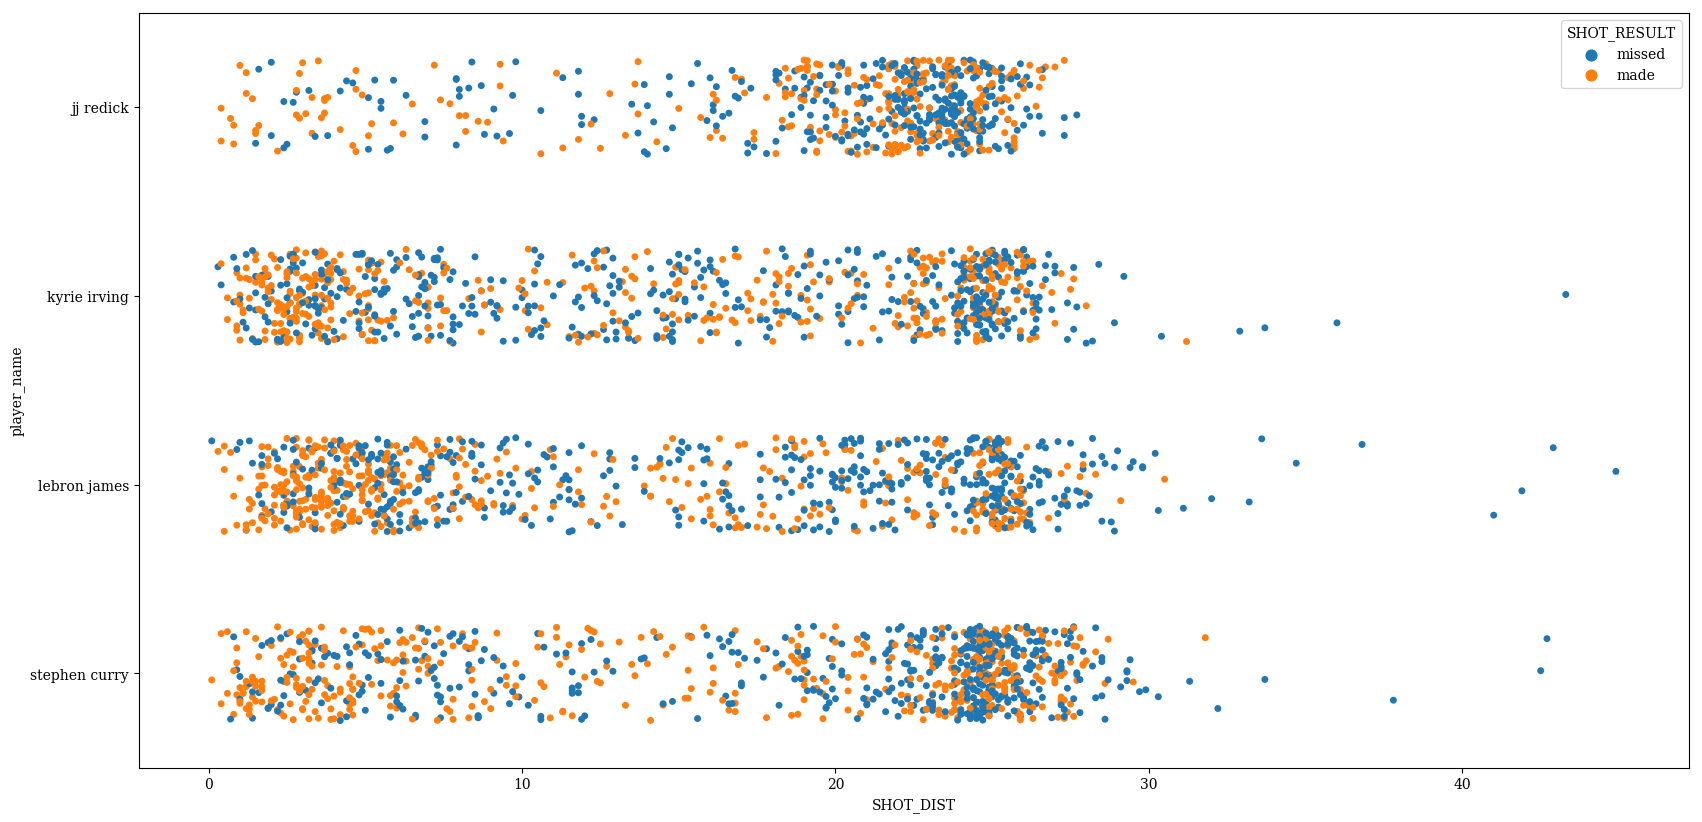

In [10]:
p = sns.stripplot(data=df,
                  y='player_name',
                  x='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25,
                  dodge=False,
                  orient='h')

For coloring, you can either provide a single color to `color`...

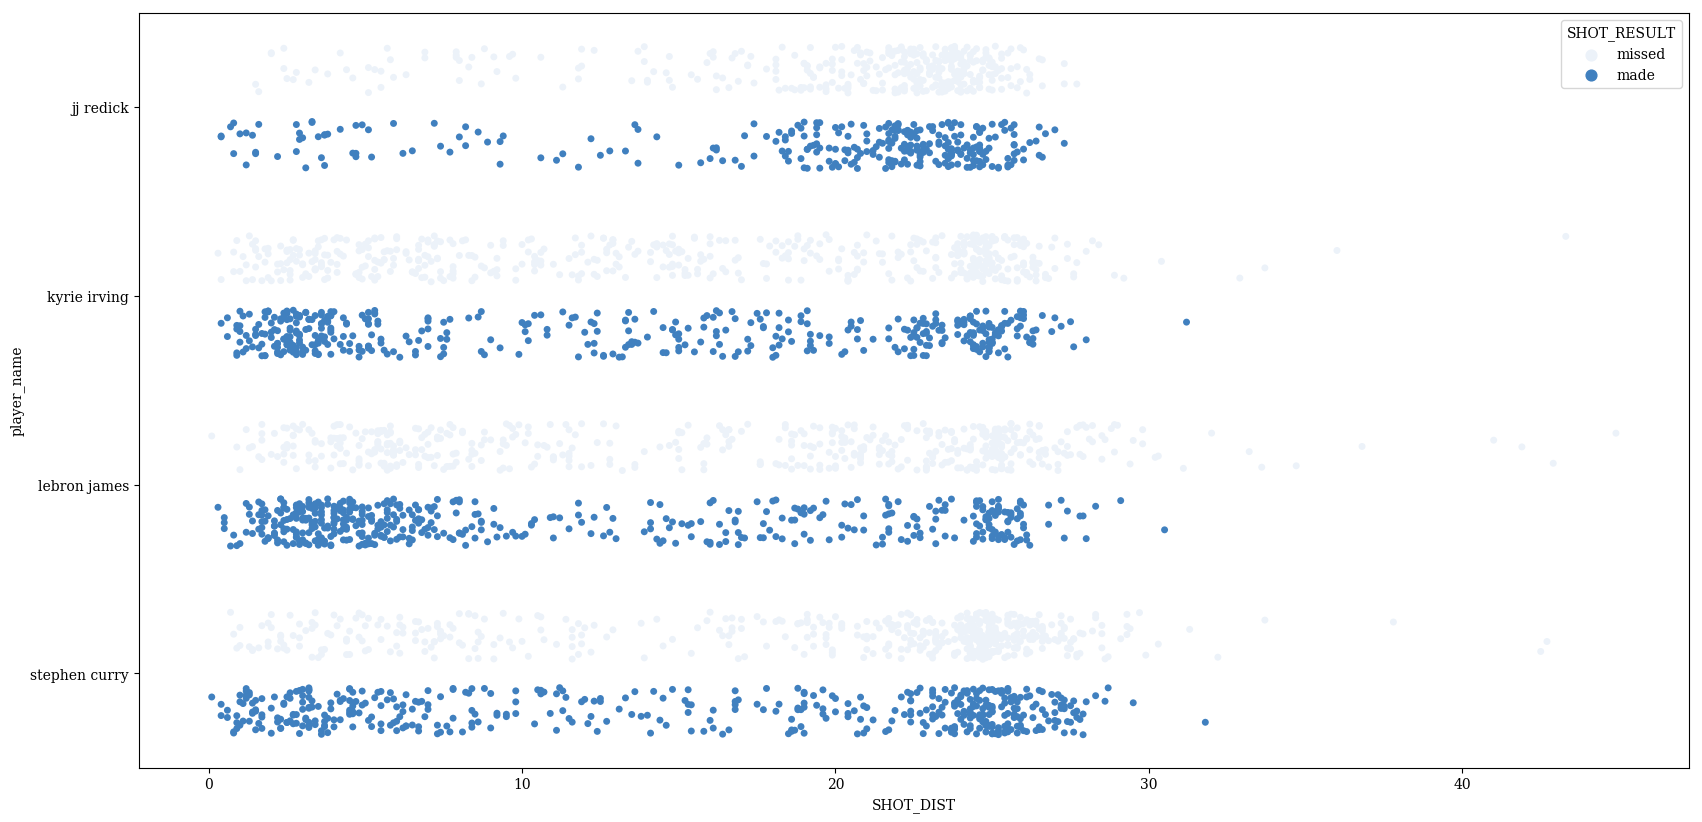

In [11]:
p = sns.stripplot(data=df,
                  y='player_name',
                  x='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25,
                  dodge=True,
                  orient='h',
                  color=(.25,.5,.75))

...or you can use one of the many variations of the `palette` parameter

In [12]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25,
                  dodge=True,
                  palette=sns.husl_palette(2, l=0.5, s=.95))

Adjust the marker `size`

In [13]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25,
                  dodge=True,
                  palette=sns.husl_palette(2, l=0.5, s=.95),
                  size=8)

Adjust the `linewidth` of the edges of the circles

In [14]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25,
                  dodge=True,
                  palette=sns.husl_palette(2, l=0.5, s=.95),
                  size=8,
                  linewidth=3)

Change the color of these lines with `edgecolor`

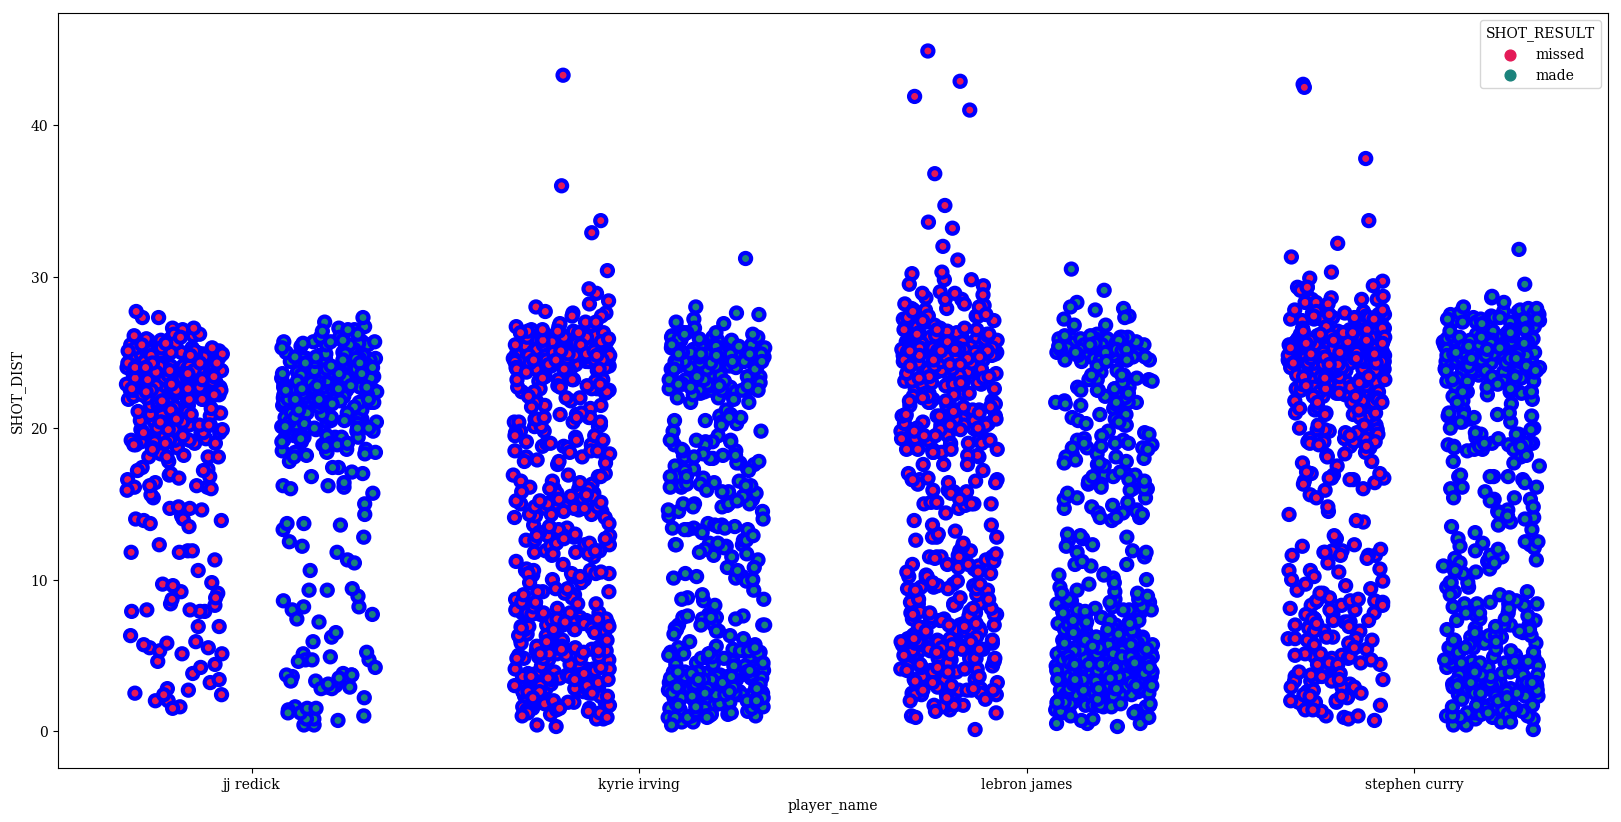

In [15]:
p = sns.stripplot(data=df,
                  x='player_name',
                  y='SHOT_DIST',
                  hue='SHOT_RESULT',
                  order=sorted(players_to_use),
                  jitter=0.25,
                  dodge=True,
                  palette=sns.husl_palette(2, l=0.5, s=.95),
                  size=8,
                  linewidth=3,
                  edgecolor='blue')

Swarmplots look good when overlaid on top of another categorical plot, like `boxplot`

In [16]:
params = dict(data=df,
              x='player_name',
              y='SHOT_DIST',
              hue='SHOT_RESULT',
              #jitter=0.25,
              order=sorted(players_to_use),
              dodge=True)
p = sns.stripplot(size=8,
                  jitter=0.35,
                  palette=['#91bfdb','#fc8d59'],
                  edgecolor='black',
                  linewidth=1,
                  **params)
p_box = sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=6,**params)

Finalize

In [17]:
plt.rcParams['font.size'] = 30
params = dict(data=df,
              x='player_name',
              y='SHOT_DIST',
              hue='SHOT_RESULT',
              #jitter=0.25,
              order=sorted(players_to_use),
              dodge=True)
p = sns.stripplot(size=8,
                  jitter=0.35,
                  palette=['#91bfdb','#fc8d59'],
                  edgecolor='black',
                  linewidth=1,
                  **params)
p_box = sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=6,**params)
handles,labels = p.get_legend_handles_labels()
#for h in handles:
#    h.set_height(3)
#handles[2].set_linewidth(33)

plt.legend(handles[2:],
           labels[2:],
           bbox_to_anchor = (.3,.95),
           fontsize = 40,
           markerscale = 5,
           frameon=False,
           labelspacing=0.2)
plt.text(1.85,35, "Strip Plot", fontsize = 95, color='Black', fontstyle='italic')
plt.xlabel('')
plt.ylabel('Shot Distance (ft)')
plt.gca().set_xlim(-0.5,3.5)
xlabs = p.get_xticklabels()
xlabs[0].set_text('JJ Redick')
for l in xlabs[1:]:
    l.set_text(" ".join(i.capitalize() for i in l.get_text().split() ))
p.set_xticklabels(xlabs)

In [18]:
p.get_figure().savefig('../../figures/stripplot.png')

A fair bit of information is conveyed with a plot like this. JJ Redick is a shooting guard, and you see most of his shots are from a significant distances, whereas Lebron James has unsurprisingly a lot more attempts at close range. The median for Lebron's made shots is significantly lower than that for his misses, which is likely a result of him having many points from high percentage close shots/layups. There are a few outlying shots from very high distances, essentially all misses, that most likely are right before a buzzer.